In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [ ]:
df=pd.read_csv("SeaLevel.csv")

In [ ]:
df.head()

,Year,Sea_ Level
0,1902,6677
1,1903,6655
2,1904,6689
3,1905,6678
4,1906,6727


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Year        120 non-null    int64
 1   Sea_ Level  120 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


In [ ]:
#converting year column into datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [ ]:
# setting the date column as our index
df = df.set_index('Year')
df.head()

,Sea_ Level
Year,
1902-01-01,6677
1903-01-01,6655
1904-01-01,6689
1905-01-01,6678
1906-01-01,6727


In [ ]:
# Checking if there are any negative values
(df < 0).values.any()

True

In [ ]:
# Removing any negative values that may affect the plot
df = df[df.select_dtypes(include=[np.number]).ge(0).all(1)]

# **Plotting Time Series**

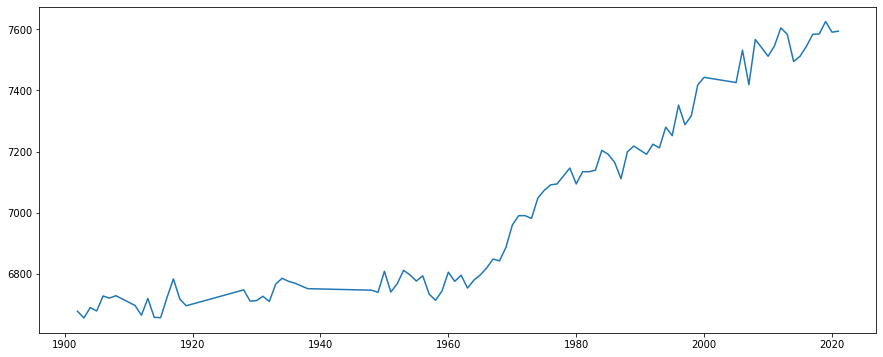

In [ ]:
fig = plt.figure(figsize=(15,6))
plt.plot(df.index, df['Sea_ Level'])

<ipython-input-22-6308b7c0d233>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df['Sea_ Level'], model='multiplicative', freq=30)


Text(0.5, 1.01, 'Manila South Harbor Sea Level Rise')

<Figure size 432x288 with 0 Axes>

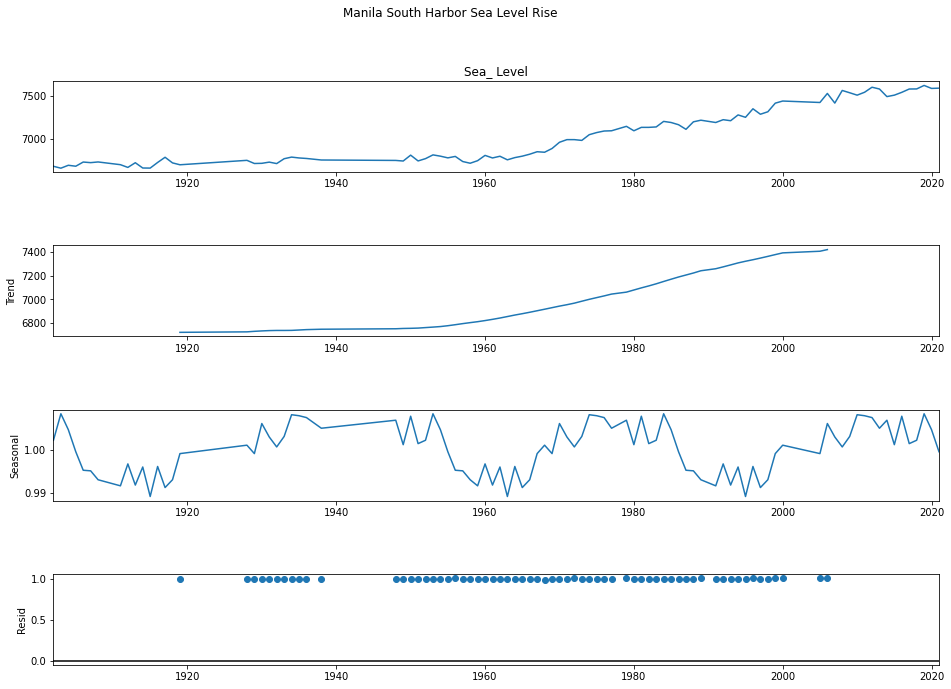

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Sea_ Level'], model='multiplicative', freq=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)
plt.suptitle('Manila South Harbor Sea Level Rise', y=1.01)

In [ ]:
next_years = [pd.to_datetime('2023-01-01'),
              pd.to_datetime('2024-01-01'),
              pd.to_datetime('2025-01-01'),
              pd.to_datetime('2026-01-01'),
              pd.to_datetime('2027-01-01'),
              pd.to_datetime('2028-01-01'),
              pd.to_datetime('2029-01-01'),
              pd.to_datetime('2030-01-01'),
              pd.to_datetime('2031-01-01'),
              pd.to_datetime('2032-01-01'),
              pd.to_datetime('2033-01-01')]
test2 = pd.Series(next_years)

In [ ]:
test2 = pd.DataFrame(test2, columns=['Year'])
test2['Year'] = pd.to_datetime(test2['Year'], format='%Y')
test2.head()

,Year
0,2023-01-01
1,2024-01-01
2,2025-01-01
3,2026-01-01
4,2027-01-01


In [ ]:
ts = df['Sea_ Level']

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    critical_value = dftest[4]['5%']
    test_statistic = dftest[0]
    alpha = 1e-3
    pvalue = dftest[1]
    if pvalue < alpha and test_statistic < critical_value:  # null hypothesis: x is non stationary
        print("X is stationary")
        return True
    else:
        print("X is not stationary")
        return False

In [ ]:
ts_diff = pd.Series(ts)
d = 0
while test_stationarity(ts_diff) is False:
    ts_diff = ts_diff.diff().dropna()
    d = d + 1

X is not stationary
X is stationary


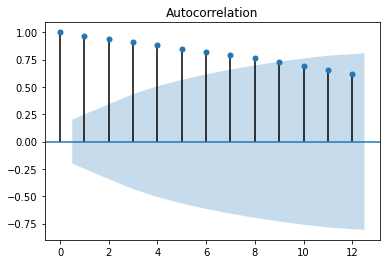

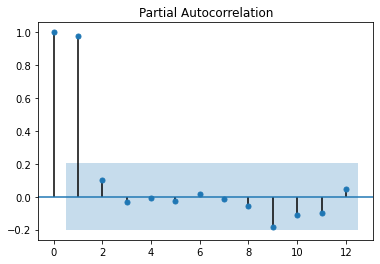

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Sea_ Level'], lags =12)
plt.show()
print("\n")
plot_pacf(df['Sea_ Level'], lags =12)
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = 8
q = 1
model = SARIMAX(ts, order=(p,d,q))
model_fit = model.fit(disp=1,solver='powell')

fcast = model_fit.get_prediction(start=1, end=len(ts)+10)
ts_p = fcast.predicted_mean
ts_ci = fcast.conf_int()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [ ]:
ts_p

1      6672.650138
2      6660.602557
3      6680.074916
4      6680.180489
5      6712.231601
          ...     
100    7680.110927
101    7690.930777
102    7699.057354
103    7708.037269
104    7718.018364
Name: predicted_mean, Length: 104, dtype: float64

In [ ]:
df2 = pd.read_csv('SeaLevel.csv')
df2['Year'] = pd.to_datetime(df2['Year'], format='%Y')
#df.set_index('date', inplace=True)
df2 = df2[df2.select_dtypes(include=[np.number]).ge(0).all(1)]
df2.drop(columns=['Sea_ Level'], inplace=True)

In [ ]:
df2.reset_index(inplace=True)

In [ ]:
df2.drop(columns=['index'], inplace=True)

In [ ]:
df2

,Year
0,1902-01-01
1,1903-01-01
2,1904-01-01
3,1905-01-01
4,1906-01-01
...,...
89,2017-01-01
90,2018-01-01
91,2019-01-01
92,2020-01-01


In [ ]:
test2.reset_index(inplace=True)
test2.drop(columns=['index'], inplace=True)
test2.rename(columns= {0: "Year"}, inplace=True)

In [ ]:
df2 = df2.append(test2, ignore_index=True)

In [ ]:
df2

,Year
0,1902-01-01
1,1903-01-01
2,1904-01-01
3,1905-01-01
4,1906-01-01
...,...
100,2029-01-01
101,2030-01-01
102,2031-01-01
103,2032-01-01


In [ ]:
ts_p

1      6672.650138
2      6660.602557
3      6680.074916
4      6680.180489
5      6712.231601
          ...     
100    7680.110927
101    7690.930777
102    7699.057354
103    7708.037269
104    7718.018364
Name: predicted_mean, Length: 104, dtype: float64

In [ ]:
ts_pred = ts_p.to_frame()

In [ ]:
ts_pred.reset_index(inplace=True)

In [ ]:
ts_pred.drop(columns=['index'], inplace=True)

In [ ]:
ts_pred.rename(columns= {0: "pred"}, inplace=True)

In [ ]:
ts_pred

,predicted_mean
0,6672.650138
1,6660.602557
2,6680.074916
3,6680.180489
4,6712.231601
...,...
99,7680.110927
100,7690.930777
101,7699.057354
102,7708.037269


In [ ]:
df2['Sea_ level'] = ts_pred['predicted_mean']

In [ ]:
df2.set_index('Year', inplace=True)

In [ ]:
df2.dropna(inplace=True)
df2

,Sea_ level
Year,
1902-01-01,6672.650138
1903-01-01,6660.602557
1904-01-01,6680.074916
1905-01-01,6680.180489
1906-01-01,6712.231601
...,...
2028-01-01,7680.110927
2029-01-01,7690.930777
2030-01-01,7699.057354


In [ ]:
ts_ci.reset_index(inplace=True)
ts_ci.drop(columns=['index'], inplace=True)

In [ ]:
df3 = pd.read_csv('SeaLevel.csv')
df3['Year'] = pd.to_datetime(df3['Year'], format='%Y')
#df.set_index('date', inplace=True)
df3 = df3[df3.select_dtypes(include=[np.number]).ge(0).all(1)]
df3.drop(columns=['Sea_ Level'], inplace=True)

In [ ]:
df3.reset_index(inplace=True)

In [ ]:
df3.drop(columns=['index'], inplace=True)

In [ ]:
df3 = df3.append(test2, ignore_index=True)

In [ ]:
df3['lower Sea_ Level'] = ts_ci['lower Sea_ Level']
df3['upper Sea_ Level'] = ts_ci['upper Sea_ Level']

In [ ]:
df3.set_index('Year', inplace=True)

In [ ]:
df3.dropna(inplace=True)
df3

,lower Sea_ Level,upper Sea_ Level
Year,,
1902-01-01,6582.299193,6763.001082
1903-01-01,6574.611340,6746.593773
1904-01-01,6594.433044,6765.716789
1905-01-01,6594.600734,6765.760244
1906-01-01,6627.715339,6796.747863
...,...,...
2028-01-01,7521.816164,7838.405690
2029-01-01,7517.877475,7863.984078
2030-01-01,7513.351821,7884.762887


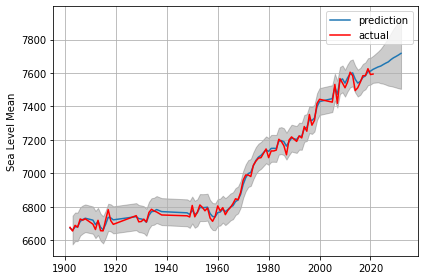

<Figure size 720x720 with 0 Axes>

In [ ]:
#plt.show()
plt.plot(df2,label='prediction')
plt.plot(df['Sea_ Level'],color='red',label='actual')
plt.fill_between(df3.index[1:],
                df3.iloc[1:, 0],
                df3.iloc[1:, 1], color='k', alpha=.2)

plt.ylabel('Sea Level Mean')
plt.legend()
plt.tight_layout()
plt.grid()
#plt.savefig('plots/IT_trend_prediction.png')
plt.show()